In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from cnn_utils import *

%matplotlib inline

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 2


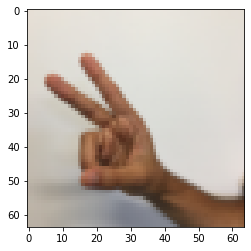

In [3]:
# Example of a picture
index = 6
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [4]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(kernel_size=(4, 4), filters=8, strides=(1, 1), padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPool2D(pool_size=(8, 8), strides=(8, 8), padding='same'))
model.add(layers.Conv2D(kernel_size=(2, 2), filters=16, strides=(1, 1), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(6, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         392       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
Total params: 1,310
Trainable params: 1,310
Non-trainable params: 0
______________________________________________________

In [7]:
model.compile(optimizer='adam', 
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
             metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 22ms/step - loss: 1.7922 - accuracy: 0.1796
Epoch 2/100
34/34 [==============================] - 1s 22ms/step - loss: 1.7907 - accuracy: 0.1685
Epoch 3/100
34/34 [==============================] - 1s 22ms/step - loss: 1.7893 - accuracy: 0.2556
Epoch 4/100
34/34 [==============================] - 1s 22ms/step - loss: 1.7886 - accuracy: 0.2157
Epoch 5/100
34/34 [==============================] - 1s 22ms/step - loss: 1.7865 - accuracy: 0.2204
Epoch 6/100
34/34 [==============================] - 1s 22ms/step - loss: 1.7837 - accuracy: 0.2407
Epoch 7/100
34/34 [==============================] - 1s 22ms/step - loss: 1.7788 - accuracy: 0.1787
Epoch 8/100
34/34 [==============================] - 1s 22ms/step - loss: 1.7712 - accuracy: 0.2407
Epoch 9/100
34/34 [==============================] - 1s 22ms/step - loss: 1.7574 - accuracy: 0.2065
Epoch 10/100
34/34 [==============================] - 1s 22ms/step - loss: 1.7407 - accuracy: 0.2685

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)